In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Table of Contents
* [Data wrangling](#chapter1)
    * [Dataframes](#section_1_1)
    * [Data filters](#section_1_2)
    * [Help functions](#section_1_3)
* [Visualisation tools](#chapter2)
    * [Stack plot 2.1](#section_2_1)
    * [Proportion of breaches 2.1.1](#sub_section_2_1_1)
    * [Map of England 2.1.2](#sub_section_2_1_2)

#### The purpose of this User Guide is to provide a brief overview of the package canseer purpose and functionality
##### Before delving into the functions, please read through the descriptions of the NHS Cancer Standards (*See Below*), as this will help understand the purpose of data presented
##### Key terms include:
* ICB – Integrated care boards, NHS administrative units replacing CCGs (Clinical Commissioning Groups)
* NHS Providers – These are NHS Trusts and independent hospitals providing care (overseen by a respective ICB)
* Standards – The NHS has three standards for cancer treatment: FDS (28-day faster diagnosis standard), DTT (31-day decision to treat), RTT (62-day referral to treat). These are explained below

In [13]:
from canseer.data_wrangling import help_with

In [15]:
help_with('standards')

There are three standards present in this dataset:
 1. The 28-day Faster Diagnosis Standard (FDS).
The standard: People should have cancer ruled out or receive a diagnosis within 28 days
NHS target: 75% of people should meet this standard

 2. 31-day decision to treat to treatment standard (DTT).
The standard: Treatment should begin within a month (31 days)of a decision to treat their cancer.
NHS target: 96% of people should meet this standard

 3.62-day referral to treatment standard
The standard: Treatment should begin within two months (62 days) of an urgent referral.
NHS target: 85% of people should meet this standard

 
 Further info at:  https://news.cancerresearchuk.org/2023/08/17/breaking-down-nhs-englands-changes-in-standards-for-cancer-care/


# Data wrangling <a class="anchor" id="chapter1"></a>
## Dataframes <a class="anchor" id="section_1_1"></a>

**get_provider_data()** produces a dataframe on cancer diagnosis referrals and treatment refferals by providers e.g. NHS trusts.
This dataframe contains information by NHS organisations, marked with their corresponding three-digit organisation code. This data is grouped by cancer type (location, level of suspicion, *etc*), as well as treatment modality, stage or referral route (screening vs urgent referral)

In [ ]:
from canseer.data_wrangling import get_provider_data

In [4]:
df_provider = get_provider_data()

In [4]:
df_provider.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 103185 entries, 2022-04-01 to 2023-03-01
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   standard            103185 non-null  category
 1   org_code            103185 non-null  category
 2   stage_or_route      103185 non-null  category
 3   treatment_modality  103185 non-null  category
 4   cancer_type         103185 non-null  category
 5   total               103185 non-null  int32   
 6   within_standard     103185 non-null  int32   
 7   breaches            103185 non-null  int32   
dtypes: category(5), int32(3)
memory usage: 2.6 MB


In [5]:
df_provider.tail()

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2023-03-01,62-day Combined,RWD,urgent_suspected_cancer,surgery,All_Cancers,83,53,30
2023-03-01,62-day Combined,RWP,urgent_suspected_cancer,surgery,All_Cancers,116,70,46
2023-03-01,62-day Combined,RXN,urgent_suspected_cancer,surgery,All_Cancers,73,27,46
2023-03-01,62-day Combined,RXW,urgent_suspected_cancer,surgery,All_Cancers,103,65,37
2023-03-01,62-day Combined,RY2,urgent_suspected_cancer,surgery,All_Cancers,12,8,4


get_national_28_day_standard, get_national_31_day_standard and get_national_61_day_standard 
creates a dataframe from data on cancer diagnosis and treatment referrals on a national level. 
This could be appended to the provider dataframe. 

In [5]:
from canseer.data_wrangling import get_national_28_day_standard
from canseer.data_wrangling import get_national_31_day_standard
from canseer.data_wrangling import get_national_62_day_standard 

In [6]:
# Reads in monthly summary of all national data for 28-days FDS (Faster Diagnosis Standard) standard.
df_nat_fds = get_national_28_day_standard()

In [8]:
df_nat_fds.head()

,total,within_standard,breaches,org_code,standard,cancer_type,treatment_modality,stage_or_route
month,,,,,,,,
2021-04-01,211835,154535,57300,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-05-01,210267,156199,54068,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-06-01,233181,170194,62987,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-07-01,222389,164461,57928,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-08-01,208788,151470,57318,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data


In [8]:
# Appends the  national summary data on axis=0 to the provider dataset (data from each NHS trust)
# Alternatively: pd.concat([df_provider, get_national_28_day_standard()], axis=0)

df_provider_nat = df_provider._(get_national_28_day_standard())

In [11]:
df_provider_nat.tail()

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2023-06-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,259629,190807,68822
2023-07-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,252133,186879,65254
2023-08-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,264533,189443,75090
2023-09-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,258858,180534,78324
2023-10-01,28-day FDS,NAT,not_applicable_national_data,not_applicable_FDS,all_national_data,271402,192880,78522


In [11]:
# Reads in RTT (Referral to Treatment, 31-day from treatment plan to starting treatment) national monthly summary
df_nat_dtt = get_national_31_day_standard()

In [12]:
df_nat_dtt.head()

,total,within_standard,breaches,org_code,standard,cancer_type,treatment_modality,stage_or_route
month,,,,,,,,
2022-04-01,45336,41965,3371,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-05-01,51800,47598,4202,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-06-01,48362,44337,4025,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-07-01,48195,44649,3546,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-08-01,50877,46668,4209,NAT,31-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data


In [13]:
# RTT
df_nat_rtt = get_national_62_day_standard()

In [14]:
df_nat_rtt.head()

,total,within_standard,breaches,org_code,standard,cancer_type,treatment_modality,stage_or_route
month,,,,,,,,
2022-04-01,19489,13456,6033,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-05-01,22696,14859,7837,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-06-01,21136,13539,7597,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-07-01,21289,13980,7309,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data
2022-08-01,22610,14760,7850,NAT,62-day Combined,all_national_data,not_applicable_national_data,not_applicable_national_data


# Data filters <a class="anchor" id="section_1_2"></a> 

To select a particular patient group within a dataframe, our filter functions can be used. 
These functions can be selected on the basis of individual variables: select_months(), select_org(), select_cancer(), select_standard(), select_treatment_modality(), select_stage_or_route(). 

Function **filter_data()** enables the user to filter multiple variables, using keyword arguments.

In [17]:
from canseer.data_wrangling import select_months, select_org, select_cancer, select_standard
from canseer.data_wrangling import select_treatment_modality, select_stage_or_route
from canseer.data_wrangling import filter_data 

For example, select_org can be used on the provider dataset to filter by organisation.

In [17]:
df_provider_r1k_r0A = select_org(df_provider, ['R1K', 'R0A'])

In [18]:
df_provider_r1k_r0A.head()

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,R1K,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,262,255,7
2022-04-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,382,144,238
2022-04-01,28-day FDS,R0A,screening,not_applicable_FDS,Invalid,143,67,76
2022-04-01,28-day FDS,R1K,screening,not_applicable_FDS,Suspected_breast_ca,4,2,2
2022-04-01,28-day FDS,R1K,screening,not_applicable_FDS,Suspected_gynecological_ca,35,12,23


######
##### All filter functions can also be used on the national dataframe
######

In [20]:
dfs_nat_fds_april_may = select_months(df_nat_fds, '04/2021','05/2021')

In [21]:
dfs_nat_fds_april_may.head()

,total,within_standard,breaches,org_code,standard,cancer_type,treatment_modality,stage_or_route
month,,,,,,,,
2021-04-01,211835,154535,57300,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data
2021-05-01,210267,156199,54068,NAT,28-day FDS,all_national_data,not_applicable_FDS,not_applicable_national_data


######
##### **filter_data()** can be used to select multiple filters using keyword arguments in the dataframes.
######

In [24]:
filters = {'stage_or_route': ['urgent_suspected_cancer', 'screening'],
           'standard': 'FDS',
           'org': ['RWP', 'RXQ','R0A'],
           'cancer_type': ['Suspected_breast_ca', 'Suspected_lower_GI_ca']
          }

df_provider_filter = filter_data(df_provider, filters)
df_provider_filter.head(5)

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,RXQ,screening,not_applicable_FDS,Suspected_breast_ca,29,23,6
2022-04-01,28-day FDS,RWP,screening,not_applicable_FDS,Suspected_breast_ca,18,17,1
2022-04-01,28-day FDS,RWP,screening,not_applicable_FDS,Suspected_lower_GI_ca,1,0,1
2022-04-01,28-day FDS,RXQ,screening,not_applicable_FDS,Suspected_lower_GI_ca,2,2,0
2022-04-01,28-day FDS,R0A,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,1135,361,774


##### filter_data() accepts both lists of filter variables after a keyword, but also individual values (as a string) following a keyword.

In [25]:
filters = {'stage_or_route': 'urgent_suspected_cancer',
           'standard': 'FDS',
           'org': 'RWP',
           'cancer_type': 'Suspected_breast_ca',
          }

df_provider_filter = filter_data(df_provider, filters)
df_provider_filter.head(5)

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches
month,,,,,,,,
2022-04-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,225,208,17
2022-05-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,336,312,24
2022-06-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,238,223,15
2022-07-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,308,283,25
2022-08-01,28-day FDS,RWP,urgent_suspected_cancer,not_applicable_FDS,Suspected_breast_ca,300,278,22


# Help functions <a class="anchor" id="section_1_3"></a> 

**help_with()** provides more information on the cancer referrals data. By using keywords (*see docstring*) you can choose to see more about a particular aspect of the data

In [18]:
from canseer.data_wrangling import help_with

In [27]:
help_with()

Please select which aspect of the data you need help with:
1.) NHS Cancer standards
2.) Types of cancer
3.) NHS Organisation Codes
4.) Stage/Route
5.) Treatment modality
6.) Breaches
7.) Within Standard




Select the number of a topic from above: 

 1


There are three standards present in this dataset:
 1. The 28-day Faster Diagnosis Standard (FDS).
The standard: People should have cancer ruled out or receive a diagnosis within 28 days
NHS target: 75% of people should meet this standard

 2. 31-day decision to treat to treatment standard (DTT).
The standard: Treatment should begin within a month (31 days)of deciding to treat their cancer.
NHS target: 96% of people should meet this standard

 3.62-day referral to treatment standard
The standard: Treatment should begin within two months (62 days) of an urgent referral.
NHS target: 85% of people should meet this standard

 
 Further info at:  https://news.cancerresearchuk.org/2023/08/17/breaking-down-nhs-englands-changes-in-standards-for-cancer-care/


######
##### **name_org_code()** can be used to provide the org_code of a particular NHS Trust. 
######

In [19]:
from canseer.data_wrangling import name_org_code

In [23]:
trust_to_code_dict = name_org_code()
trust_to_code_dict['Manchester University Nhs Foundation Trust']
# Printing trust_to_code_dict will print the dictionary of NHS Trust name: Org Code

'R0A'

In [34]:
name_org_code(trust_name='Royal Devon University Healthcare Nhs Foundation Trust')

'RH8'

In [15]:
# if print_dict parameter is set to True, the entire lookup dictionary will be rpinted
# >>> name_org_code(print_dict=True)

# Visualisation Tools <a class="anchor" id="chapter2"></a>

## Stackplot <a class="anchor" id="section_2_1"></a>
A stack plot can be created to show the number of referrals over time, notably those meeting the standard and those breaching it.

In [1]:
from canseer.cancer_plotting import plot_stacked_referrals

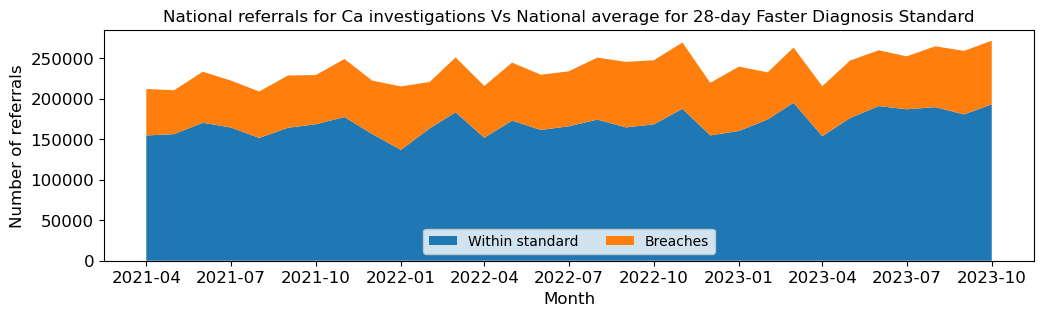

In [23]:
# Defining the Dataframe (National monthly summary for 28-day FDS standard)
df = df_nat_fds

subgroups = [df_nat_fds["within_standard"],
             df_nat_fds["breaches"]
            ]
#Number of groups used
ncol = 2

# Figure legend labels and title
labels = ["Within standard", "Breaches"] 
graph_title = "National referrals for Ca investigations"\
               + " Vs National average for 28-day Faster Diagnosis Standard"
y_label = "Number of referrals"

#Plotting national data
fig, ax = plot_stacked_referrals(df, subgroups,
                                 labels, ncol,
                                 graph_title, y_label)

# Proportion of Breaches <a class="anchor" id="section_2_2"></a>

######
#### Function **proportion_breaches()** allows the user to calculate the proportion of cases which fall outside a given standard (breaches), which is then calculated and visualised.
######

######
##### **proportion_breaches()** adds a **proportion_of_breaches** column to a given DataFrame (equal to the number of breaches/total number of referrals). A moving average is also added to show trends over time. The window size is dependent on how many months the moving average is calculated over.
######

In [30]:
df_provider_prop_breaches = proportion_breaches(df_provider, window_size=1)
df_provider_prop_breaches.head(3)

,standard,org_code,stage_or_route,treatment_modality,cancer_type,total,within_standard,breaches,proportion_breaches,moving_average
month,,,,,,,,,,
2022-04-01,28-day FDS,R1K,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,262,255,7,0.026718,0.026718
2022-04-01,28-day FDS,R0A,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,382,144,238,0.623037,0.623037
2022-04-01,28-day FDS,R0D,breast_symptom_non_cancer,not_applicable_FDS,Unsuspected_breast_ca,3,2,1,0.333333,0.333333


######
The proportion of breaches for a given standard over time can be compared to the
proportion of breaches nationally. **prop_breaches_graph()** presents the proportion of breaches for a filtered provider (NHS trust) dataframe compared to the National proportion of breaches.

######

In [31]:
from canseer.cancer_plotting import prop_breaches_graph

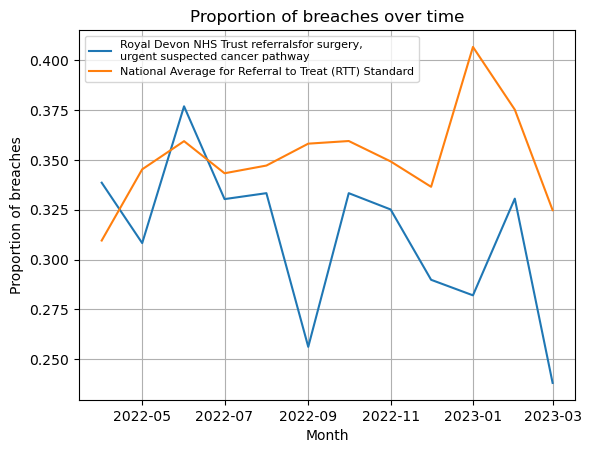

In [40]:
filters = {'standard':'RTT', 
           'org': 'RH8', 
           'treatment': 'surgery', 
           'stage_or_route':'urgent_suspected_cancer'}

labels = [
    ('Royal Devon NHS Trust referrals'
     + 'for surgery,\nurgent suspected cancer pathway'),
    'National Average for Referral to Treat (RTT) Standard'
]
fig, ax = prop_breaches_graph(df_provider, filters, labels)

## Map of England <a class="anchor" id="section_2_2"></a>

##### **plot_icb_map()** allows flexible plotting of the proportion of breaches from the Provider Dataset (loaded by 'get_provider_data()') for each Integrated Care Board (ICB, or NHS administrative units replacing Clinical Commissioning Groups (CCGs))
##### The colourmap reflects the number of cancers for each ICB that are treated within the NHS targets for each standard. NHS targets can be viewed by using "help_with('standards')"

In [41]:
from canseer.cancer_plotting import plot_icb_map

In [6]:
help(plot_icb_map)

Help on function plot_icb_map in module canseer.cancer_plotting:

plot_icb_map(data, filters={'standard': 'FDS'}, figsize=(7, 7), dpi=300, edgecolor='black', lw=0.2)
    Plots an Integrated Care Board (ICB) map based on specified filters.
    The Colour Map is able to identify which ICBs meet are able to meet the NHS target for a given standard.
    
    
    Parameters
    ----------
    data : DataFrame
        DataFrame containing the necessary data for mapping.
    filters : dict, optional
        Dictionary specifying filters for data selection.
        Defaults to {'standard': 'FDS'}. See filter_data()
    figsize : tuple, optional
        Tuple specifying the figure size. Defaults to (7, 7).
    dpi : int, optional
        Dots per inch for the figure resolution. Defaults to 300.
    edgecolor : str, optional
        Colour of the map boundaries. Defaults to 'black'.
    lw : float, optional
        Line width of the map boundaries. Defaults to 0.2.
    
    Returns
    -------


#####
#### In the example below, no filtering arguments are passed, and the default FDS standard for all types of cancer is displayed
#####

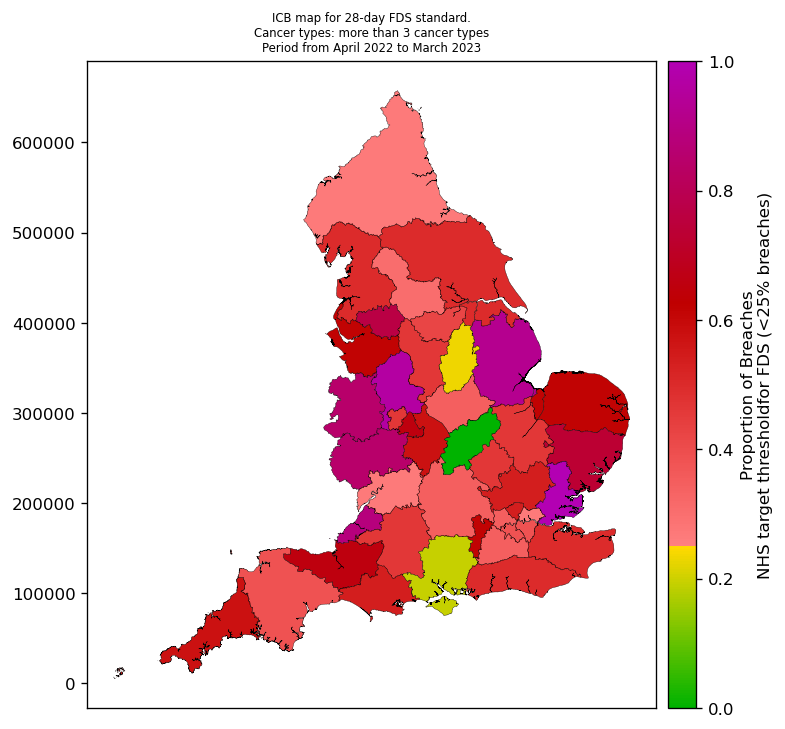

In [7]:
fig, ax = plot_icb_map(data=df_provider, dpi=120)

######
##### The user is able to specify types of cancer that they want to investigate. This will be reflected in the figure title if less than three types of cancer are selected.
##### The same is true for period defined by 'start_month' and 'end_month' keywords in the 'filter' parameter 

######

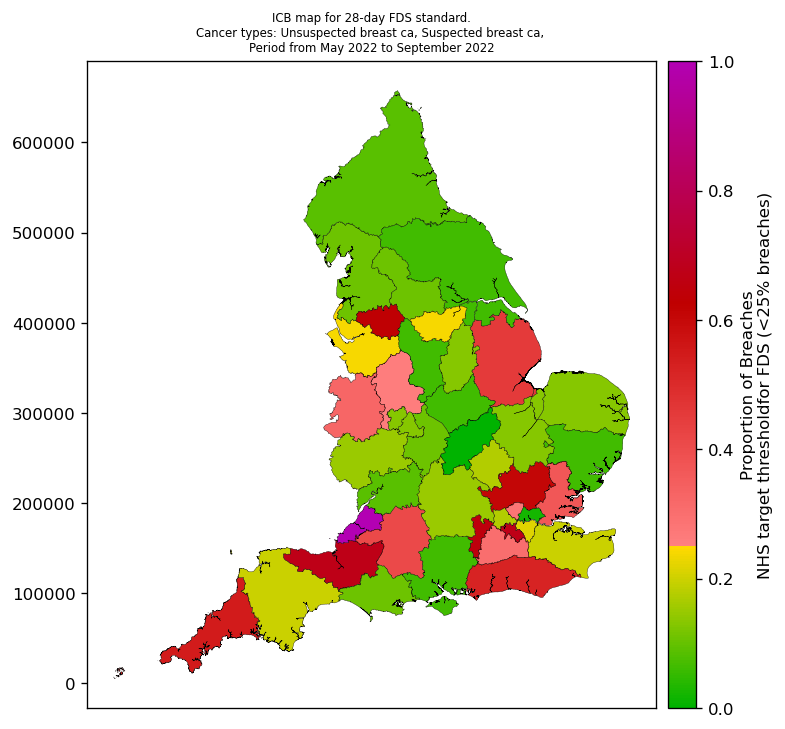

In [8]:
fig, ax = plot_icb_map(data=df_provider,
                       filters={'start_month':'05-2022',
                                'end_month':'09-2022',
                                'standard':'FDS',
                                'cancer_type' :['Suspected_breast_ca','Unsuspected_breast_ca']
                                },
                       dpi=120
                      )

######
##### Changing the standard by which data is filtered also changes the colourmap to reflect the NHS defined target.
This also changes the title of the figure

######

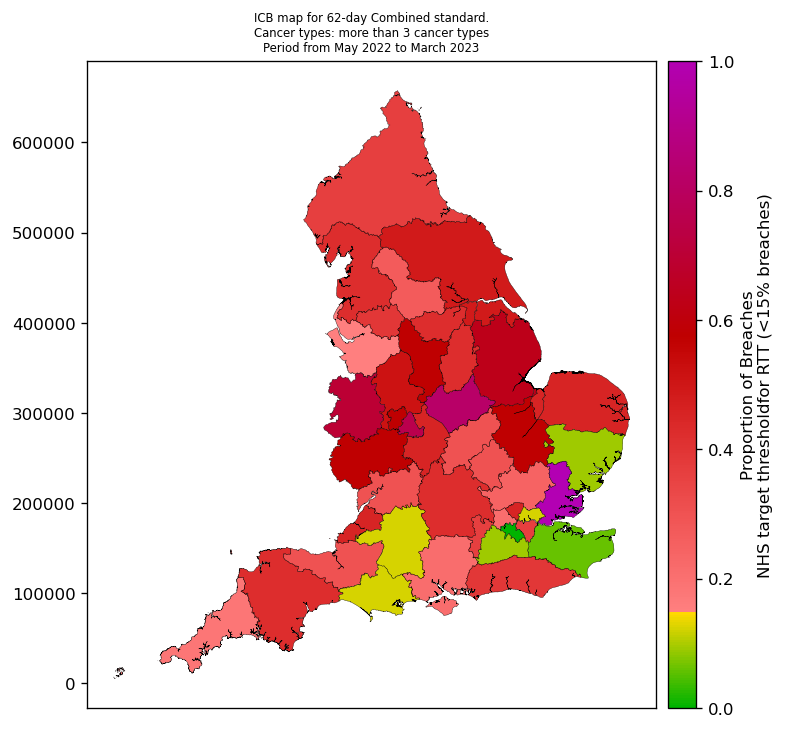

In [9]:
fig, ax = plot_icb_map(data=df_provider,
                       filters={'start_month':'05-2022',
                                'end_month':'04-2023',
                                'standard':'RTT',
                                },
                       dpi=120
                      )

######
##### **plot_icb_map()** relies on the function select_to_plot() that allows more flexibility for data filtering
**select_to_plot()** allows the user to filter the data on either a dictionary of keywords, or individual parameters. 
This function returns a GeoPandas dataframe, a dictionary of labels, and, optionally, the filtered dataset with ICB names appended to it

######

In [10]:
from canseer.cancer_plotting import select_to_plot

In [13]:
help(select_to_plot)

Help on function select_to_plot in module canseer.cancer_plotting:

select_to_plot(data, gdf=None, filters=None, start_month='2022-04-01', end_month='2023-03-01', standard='FDS', stage_or_route=None, treatment=None, cancer_type=None, return_filtered=False)
    Selects and filters the data for plotting on a map.
    
    Parameters
    ----------
    data : DataFrame
        The input DataFrame containing the data to be filtered and plotted.
    gdf : GeoDataFrame, optional
        The GeoDataFrame representing the geographical data
        for mapping. Default is None.
    filters : dict, optional
        A dictionary of filters to apply.
        If provided, other filtering arguments ignored. Default is None.
    start_month : str, optional
        The start month for filtering data. Default is '2022-04-01'.
    end_month : str, optional
        The end month for filtering data. Default is '2023-03-01'.
    standard : str, optional
        The standard for filtering data. Default is '